## Hyundai_used_car_ML

Md. Rakibul Hasan
<br> Civil Engineer
<br> MS in Disaster Management (Contd.), University of Dhaka.


#### Objectives:

- Supervised Learning: Linear Regression
- train data, test data
- Understanding the equation of a straight line
- feature coefficient (slope, gradient, m)
- bias coeffcient (y-interccept, c)
- domain: x-axis, independent variable
- range: y-axis, dependent variable
- loss function, cost function, objective function, error function
- bias-variance tradeoff, overfitting, underfitting
- ordinary least square method
- gradient descent method
- residual, error, squared error, RMSE - Root Mean Squared Error

#### References:
Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#### Importing required Libraries

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

#### Loading data

In [28]:
df = pd.read_csv("Hyundai.csv")

display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai
5,I10,2015,6149,Manual,41650,Petrol,20,60.1,1.0,Hyundai
6,I20,2015,6799,Manual,39547,Petrol,30,55.4,1.2,Hyundai
7,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7,Hyundai
8,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4,Hyundai
9,Tucson,2016,12163,Manual,21014,Diesel,30,61.7,1.7,Hyundai


(4860, 10)


#### The Feature variables of the given dataset :
**model**: models of the Hyundai cars
<br>**year**: Manufacturing year of the year
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: the selling price of the car

#### Finding correlations between the variables

In [29]:
df_cor = df.corr()

display(df_cor)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.575765,-0.716325,0.271535,-0.180792,-0.034544
price,0.575765,1.000000,-0.443576,0.321028,-0.320355,0.522384
mileage,-0.716325,-0.443576,1.000000,-0.205910,0.181491,0.178697
tax,0.271535,0.321028,-0.205910,1.000000,-0.451991,0.224927
mpg,-0.180792,-0.320355,0.181491,-0.451991,1.000000,-0.212200
engineSize,-0.034544,0.522384,0.178697,0.224927,-0.212200,1.000000


#### Show a heatmap of the correlations

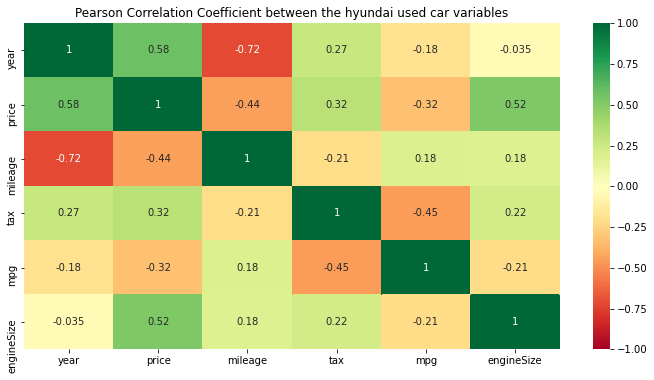

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient between the hyundai used car variables")
plt.show()

**Observations:**

- Car price increases when engineSize increases 
- Car price decreases when mpg increases 
- Car price decreases when the mileage increases 
- When the engineSize increases, the mpg decreases
- Car price increases with the latest year cars

#### checking for missing values, data types of the columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
 9   Make          4860 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 379.8+ KB


Number of observations (rows) = 4860
<br>Number of columns = 10
<br>Number of categorical variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, price, mileage, mpg, engineSize

<br>**The dataset has no missing values**

In [32]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')


#### Separating the features and target variable¶

In [33]:
features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(4860, 5) (4860, 1)


#### Creating train and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3888, 5) (972, 5) (3888, 1) (972, 1)


#### Linear Regression

In [35]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Prediction

In [36]:
y_pred = model.predict(X_test)

print(y_pred)

[[18090.2908902 ]
 [15400.84730236]
 [10704.56393038]
 [15018.81683668]
 [19558.22999621]
 [ 9152.65987948]
 [ 9139.23248276]
 [10415.39462028]
 [ 9273.95431664]
 [18942.92305129]
 [11603.84996307]
 [16594.91189813]
 [16836.40398038]
 [10703.17536488]
 [10500.15873342]
 [13336.46568964]
 [ 9084.41667473]
 [10984.73902085]
 [15346.14362395]
 [ 5015.12472204]
 [13435.1719205 ]
 [16613.79538692]
 [ 7807.25557409]
 [12963.76999894]
 [11166.59643227]
 [ 9464.31381647]
 [11312.57407505]
 [ 4229.42187354]
 [ 3590.64411707]
 [15989.60752331]
 [15155.77508217]
 [ 8514.26352677]
 [14262.22742047]
 [12130.23126847]
 [14157.41687144]
 [13968.58517843]
 [13305.51278983]
 [23682.74346583]
 [18274.71010049]
 [ 9495.17003159]
 [12920.25797645]
 [13003.93845566]
 [14695.78622791]
 [ 9365.17675629]
 [ 9078.35769144]
 [23848.66397048]
 [13871.37643967]
 [14944.0721344 ]
 [10866.95218579]
 [12539.90403337]
 [11494.34080562]
 [ 8903.80303985]
 [12701.13298408]
 [14084.21343833]
 [10257.38420544]
 [17700.25

In [37]:
print(y_test)

      price
2186  17990
3351  17150
2651   7040
2104  16990
3811  25000
...     ...
829    6995
1479  14750
2534  18200
2029  13690
2266  17599

[972 rows x 1 columns]


#### Prediction Error

In [38]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print('The value of Root Mean Squared Error: ', RMSE)

The value of Root Mean Squared Error:  4254.194334823572
